# Unit 4 - Interpolation & Data Fitting

In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import MyFunc
import math

## Problem Set 3.1 #15 (Task 2)

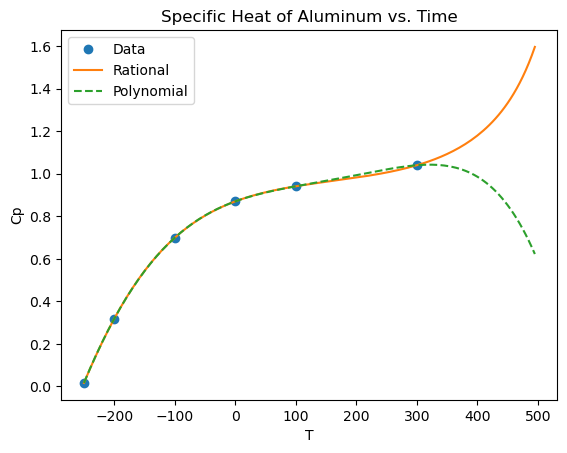

In [2]:
# Initialize values for plot
T = np.array([-250,-200,-100,0,100,300], dtype = "float")
Cp = np.array([0.0163,0.318,0.699,0.870,0.941,1.04], dtype = "float")
x = np.arange(-250,500,5)
n = len(x)
y = np.zeros((n,2))

a = MyFunc.coeffts(T,Cp) # Run coeffts Function

# Create y values for plot
for i in range(n):
    y[i,0] = MyFunc.rational(T,Cp,x[i]) # Rationialization
    y[i,1] = MyFunc.evalPoly(a,T,x[i]) # Polynomial

# Plot data and curves
plt.plot(T,Cp,'o',x,y[:,0],'-',x,y[:,1],'--')
plt.xlabel('T')
plt.ylabel('Cp')
plt.title("Specific Heat of Aluminum vs. Time")
plt.legend(('Data','Rational','Polynomial'),loc = 0)
plt.show()


## Problem Set 3.1 #17 (Task 2)


At Re = 5, Cd = 6.90159241175195

At Re = 50, Cd = 1.590835404677944

At Re = 500, Cd = 0.557433520351612

At Re = 5000, Cd = 0.38682177204045887


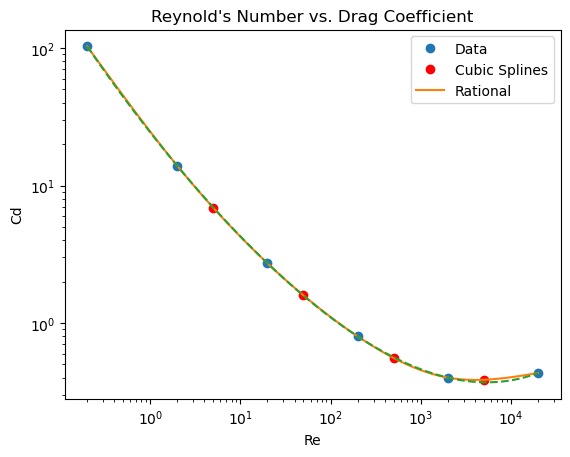

In [3]:
# Initialize values for graph
Re = np.array([.2,2,20,200,2000,20000], dtype = "float")
Cd = np.array([103,13.9,2.72,0.800,0.401,0.433], dtype = "float")
Re_values = np.array([5, 50, 500, 5000], dtype = "float") # Values for interpolation

# Import curvatures function
k = MyFunc.curvatures(np.log(Re),np.log(Cd))

# Initialize arrays
n=len(Re_values)
interp_pt = np.zeros((n))
Re_plot = np.logspace(np.log10(0.2), np.log10(20000), 1000)

# Calculate interpolated Cd from Re_values
for j in range(n):
    interp_pt[j] = np.exp(MyFunc.evalSpline(np.log(Re), np.log(Cd), k, np.log(Re_values[j])))
    print("\nAt Re = {0},".format(int(Re_values[j])), "Cd =",interp_pt[j]) # print values

# Initialize curve arrays
n = len(Re_plot)
a=np.zeros((n,2))

# fill array with interpolation values
for i in range(n):
    a[i,0] = np.exp(MyFunc.evalSpline(np.log(Re), np.log(Cd), k, np.log(Re_plot[i])))
    a[i,1] = np.exp(MyFunc.rational(np.log(Re), np.log(Cd), np.log(Re_plot[i])))

# Plot data and curves
plt.loglog(Re,Cd,'o',Re_values,interp_pt,"ro")
plt.loglog(Re_plot, a[:,0], '-', Re_plot, a[:,1], '--')
plt.title("Reynold's Number vs. Drag Coefficient")
plt.xlabel('Re')
plt.ylabel('Cd')
plt.legend(('Data','Cubic Splines','Rational'),loc = 0)
plt.show()

## Problem Set 3.2 #2 (Task 3)

Std. deviation = 0.031622776601683805


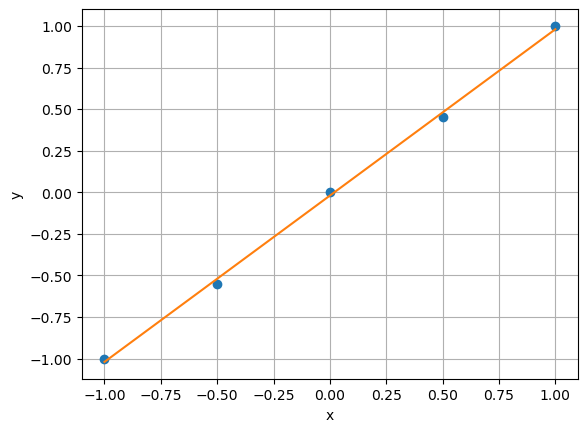

In [4]:
# Initialize data points
xData = np.array([-1.0,-0.5,0,0.5,1.0], dtype = "float")
yData = np.array([-1.00,-0.55,0.00,0.45,1.00], dtype = "float")

# Import polyFit
m = 1
coeff = MyFunc.polyFit(xData,yData,m)

print("Std. deviation =",MyFunc.stdDev(coeff,xData,yData)) # Print Std deviation

# Import plotPoly
MyFunc.plotPoly(xData,yData,coeff,xlab='x',ylab='y')

## Problem Set 3.2 #16 (Task 3)


Half-life = 80.0

Std. deviation = 1.095914317139914


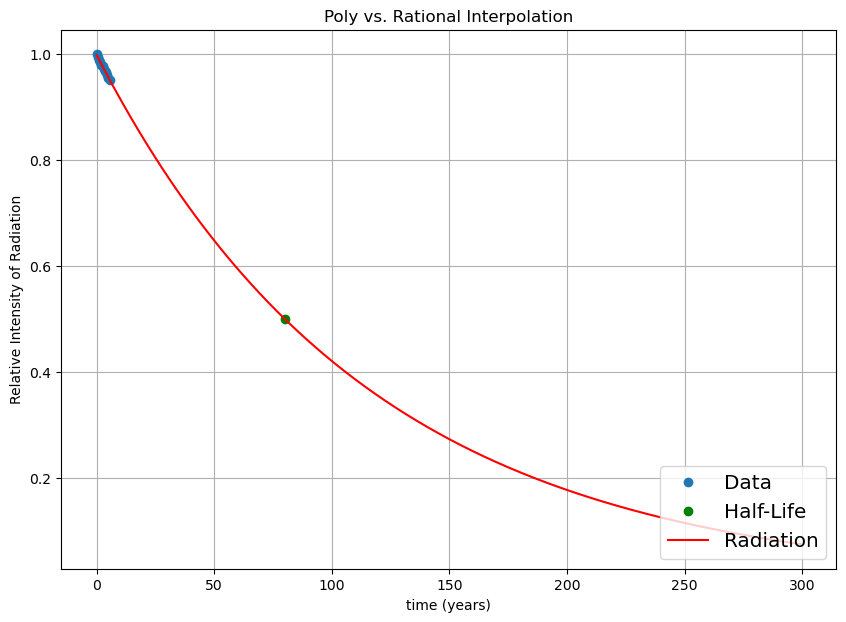

In [6]:
#
xData = np.array([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5], dtype = "float")
yData = np.array([1.000,0.994,0.990,0.985,0.979,0.977,0.972,0.969,0.967,0.960,0.956,0.952], dtype = "float")
x = np.arange(0,300,0.5)
gamma = np.zeros(len(x))

# Import polyFit
m = 1
coeff = MyFunc.polyFit(np.copy(xData),np.log(np.copy(yData)),m)

# Determine interpolation values
for i in range(len(x)):
    gamma[i] = np.exp(coeff[0])*np.exp(coeff[1]*x[i])

# Determine and print half-life
half_life = ((np.log(0.5)-coeff[0])/coeff[1]).round()
print("\nHalf-life =",half_life)
print("\nStd. deviation =",MyFunc.stdDev(coeff,xData,yData))

# Plot data and curve
fig, ax = plt.subplots()
ax.plot(xData, yData, "o", label="Data")
ax.plot(half_life,0.5, "go", label="Half-Life")
ax.plot(x, gamma, "r", label = "Radiation")
ax.set_xlabel("time (years)")
ax.set_ylabel("Relative Intensity of Radiation")
ax.legend(loc="lower right", fontsize="x-large")
ax.set_title("Poly vs. Rational Interpolation")
fig.set_size_inches([10,7])
ax.grid(True)
plt.show()